In [65]:
# Step 1: Setup
!pip install opencv-python-headless tensorflow --quiet
import zipfile, os, cv2, numpy as np, matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from IPython.display import clear_output, Image, display
import PIL.Image
import time

In [66]:
# Step 2: Extract dataset
dataset_path = "/content/dataset"
zip_file_path = "/content/dataset.zip" # Assuming your dataset is a zip file here

# Check if the dataset directory already exists, if not, extract the zip file
if not os.path.exists(dataset_path):
    print(f"Extracting dataset from {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("/content")
    print("Extraction complete.")
else:
    print(f"Dataset directory already exists at {dataset_path}. Skipping extraction.")

Dataset directory already exists at /content/dataset. Skipping extraction.


In [67]:
import zipfile
import os

# Make sure zip filename matches exactly what you uploaded
zip_filename = "dataset.zip"
extract_to = "/content/dataset"

# Unzip the dataset
with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(extract_to)

# Check extraction
print("Extracted folders:", os.listdir(extract_to))


Extracted folders: ['data']


In [68]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 48
data = []
labels = []

def find_emotion_root(base_dir):
    for root, dirs, files in os.walk(base_dir):
        emotion_dirs = [d for d in dirs if d.lower() in ['happy', 'sad', 'angry', 'fear', 'surprise', 'disgust', 'neutral']]
        if len(emotion_dirs) >= 3:
            return root
    return None

dataset_path = "/content/dataset"
actual_dataset_dir = find_emotion_root(dataset_path)

if actual_dataset_dir is None:
    print(f"Could not find a suitable dataset directory within {dataset_path}. Please check the folder structure.")
else:
    print(f"✅ Found dataset directory: {actual_dataset_dir}")

    for emotion_folder in os.listdir(actual_dataset_dir):
        emotion_path = os.path.join(actual_dataset_dir, emotion_folder)
        if os.path.isdir(emotion_path):
            for img_file in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append(emotion_folder)
                else:
                    print(f"⚠️ Could not read image: {img_path}")

# Convert to NumPy and preprocess
if not data:
    print("Error: No images loaded. Check dataset format.")
else:
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    le = LabelEncoder()
    labels = to_categorical(le.fit_transform(labels))
    print(f"✅ Successfully loaded {len(data)} images across {len(np.unique(labels, axis=0))} classes.")


✅ Found dataset directory: /content/dataset/data/train
✅ Successfully loaded 16251 images across 5 classes.


In [69]:
# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.5340 - loss: 1.1223 - val_accuracy: 0.0000e+00 - val_loss: 2.6973
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.6543 - loss: 0.9330 - val_accuracy: 0.0000e+00 - val_loss: 2.4386
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.6932 - loss: 0.8491 - val_accuracy: 0.0000e+00 - val_loss: 2.1496
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 38s 93ms/step - accuracy: 0.7106 - loss: 0.7882 - val_accuracy: 0.0000e+00 - val_loss: 2.8702
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.7282 - loss: 0.7568 - val_accuracy: 0.0000e+00 - val_loss: 2.6717
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.7429 - loss: 0.7153 - val_accuracy: 0.0028 - val_loss: 2.3531
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - accuracy: 0.7590 - loss: 0.6502 - val_accuracy: 0.0098 - val_loss: 2.4152
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.77

In [70]:
# Emoji mapping
emoji_dict = {
    'Happy': '😄',
    'Sad': '😢',
    'Angry': '😠',
    'Surprise': '😲',
    'Neutral': '😐',
    'Fear': '😨',
    'Disgust': '🤢'
}

<IPython.core.display.Javascript object>

📸 Saved to photo.jpg


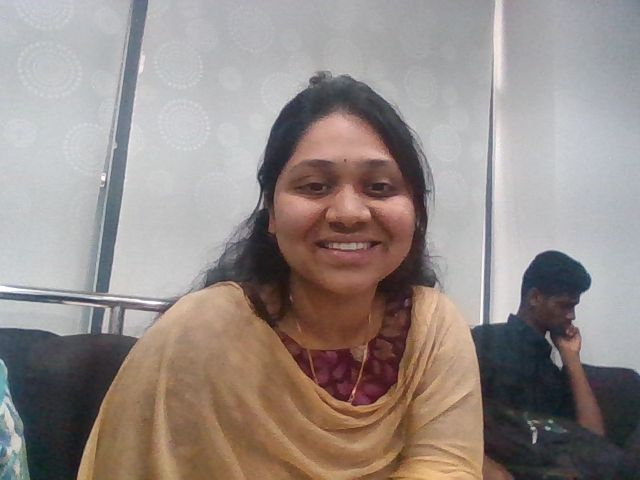

In [71]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import PIL.Image
import io
import base64
import numpy as np

# Step 1: JavaScript function to capture webcam image
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📷 Take Photo';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        takePhoto
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Step 2: Call it to take photo
photo_filename = take_photo()
print(f"📸 Saved to {photo_filename}")

# Step 3: Load as OpenCV image
img = cv2.imread(photo_filename)
cv2_imshow(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


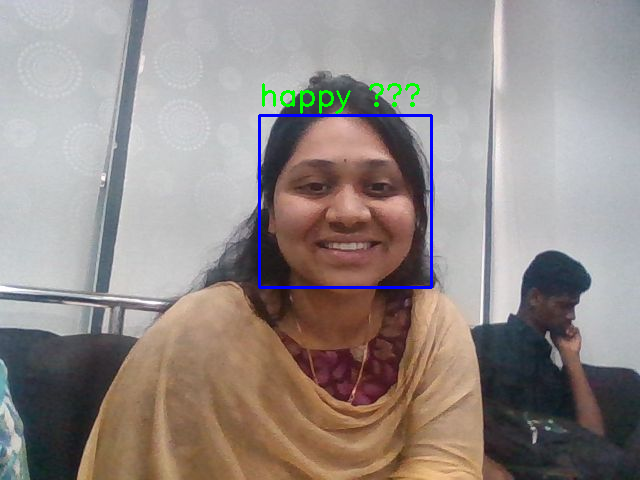

In [72]:
# Load image
img = cv2.imread(photo_filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    # Crop and preprocess face
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (48, 48)).reshape(1, 48, 48, 1) / 255.0

    # Predict emotion
    prediction = model.predict(face)
    predicted_emotion = le.inverse_transform([np.argmax(prediction)])[0]
    emoji = emoji_dict.get(predicted_emotion, '❓')

    # Draw emotion + emoji on the image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(img, f"{predicted_emotion} {emoji}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show result
cv2_imshow(img)
